In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
tickers = [
    "AAPL",  #Apple
    "MSFT",  #Microsoft
    "GOOGL", #Alphabet (Google)
    "AMZN",  #Amazon
    "META",  #Meta (Facebook)
    "TSLA",  #Tesla
    "NVDA",  #Nvidia
    "JPM",   #JPMorgan Chase
    "V",     #Visa
    "UNH"    #UnitedHealth
]

In [ ]:
#Download daily data from 2010 onwards
data = yf.download(tickers, start="2010-01-01", interval="1d", group_by='ticker', auto_adjust=True)

[*********************100%***********************]  10 of 10 completed


In [ ]:
#Extract only 'Close' prices
close_prices = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in tickers})
close_prices.dropna(inplace=True)

In [ ]:
#Save closing prices to CSV
close_prices.to_csv("closing_prices.csv")

In [ ]:
#Calculate daily returns
daily_returns = close_prices.pct_change().dropna()
daily_returns.to_csv("daily_returns.csv")

In [ ]:
#Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.to_csv("cumulative_returns.csv")

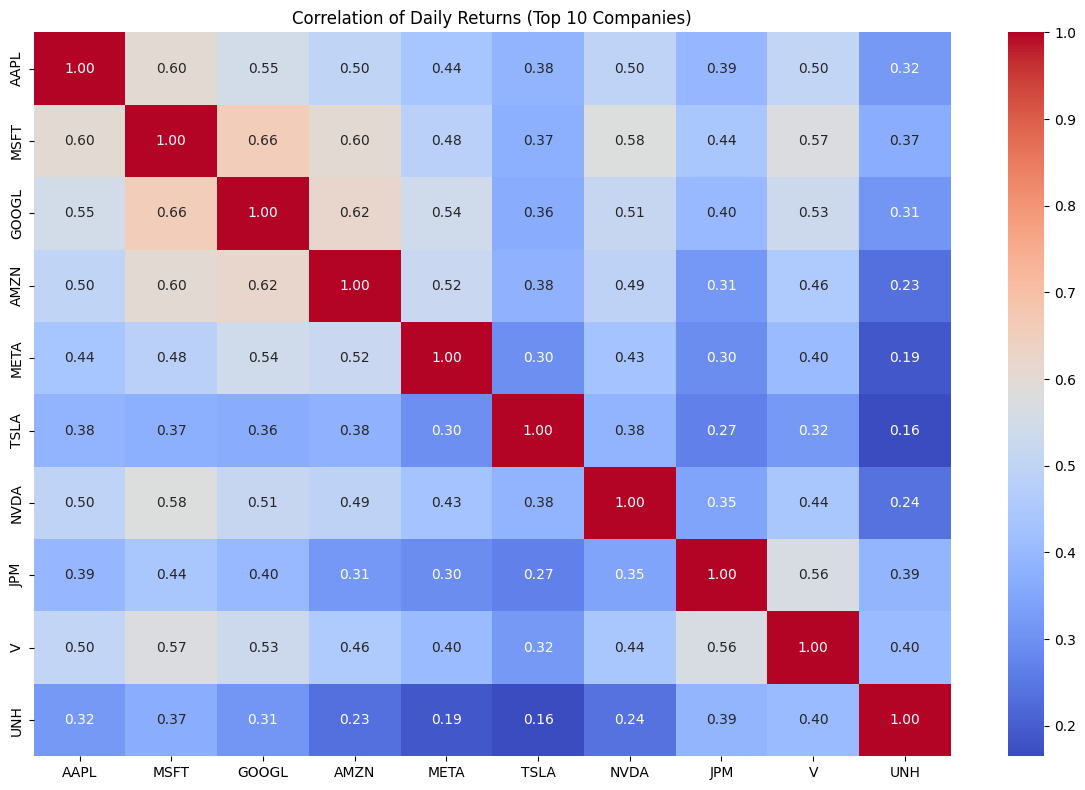

In [ ]:

#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Daily Returns (Top 10 Companies)")
plt.tight_layout()
plt.show()

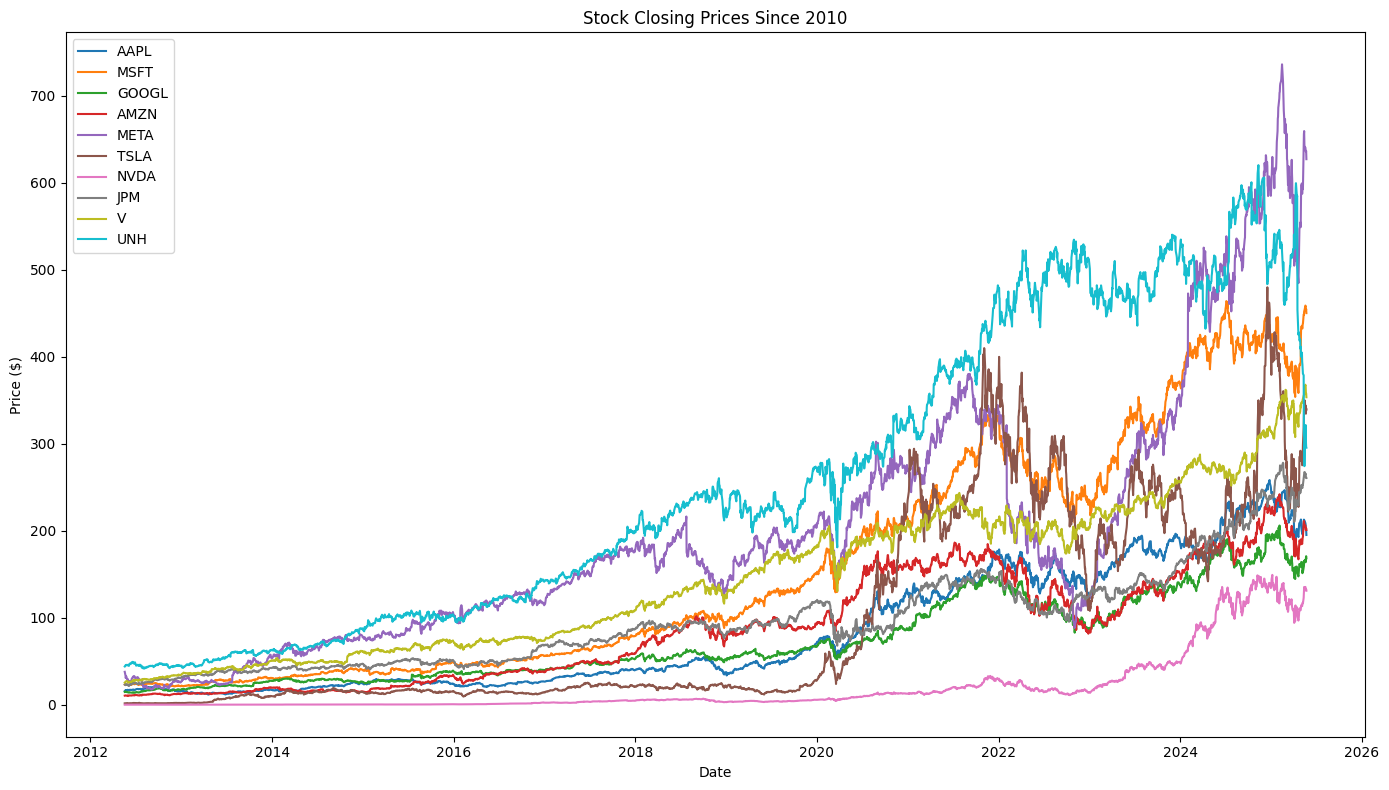

In [ ]:
#Closing Prices Over Time
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(close_prices[ticker], label=ticker)
plt.title("Stock Closing Prices Since 2010")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

C:\Users\sudee\AppData\Local\Temp\ipykernel_3864\3071748143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility.index, y=volatility.values, palette='magma')


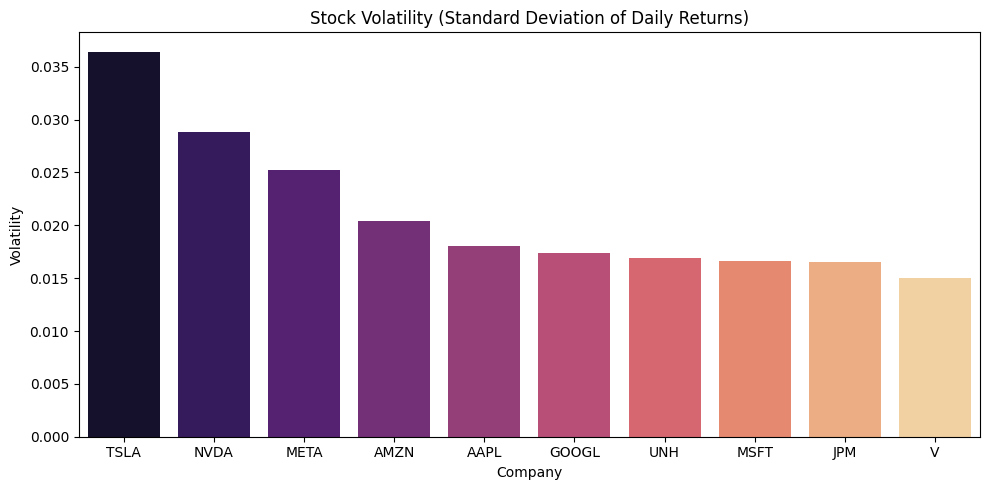

In [ ]:
#Volatility Bar Plot
volatility = daily_returns.std().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=volatility.index, y=volatility.values, palette='magma')
plt.title("Stock Volatility (Standard Deviation of Daily Returns)")
plt.xlabel("Company")
plt.ylabel("Volatility")
plt.tight_layout()
plt.show()

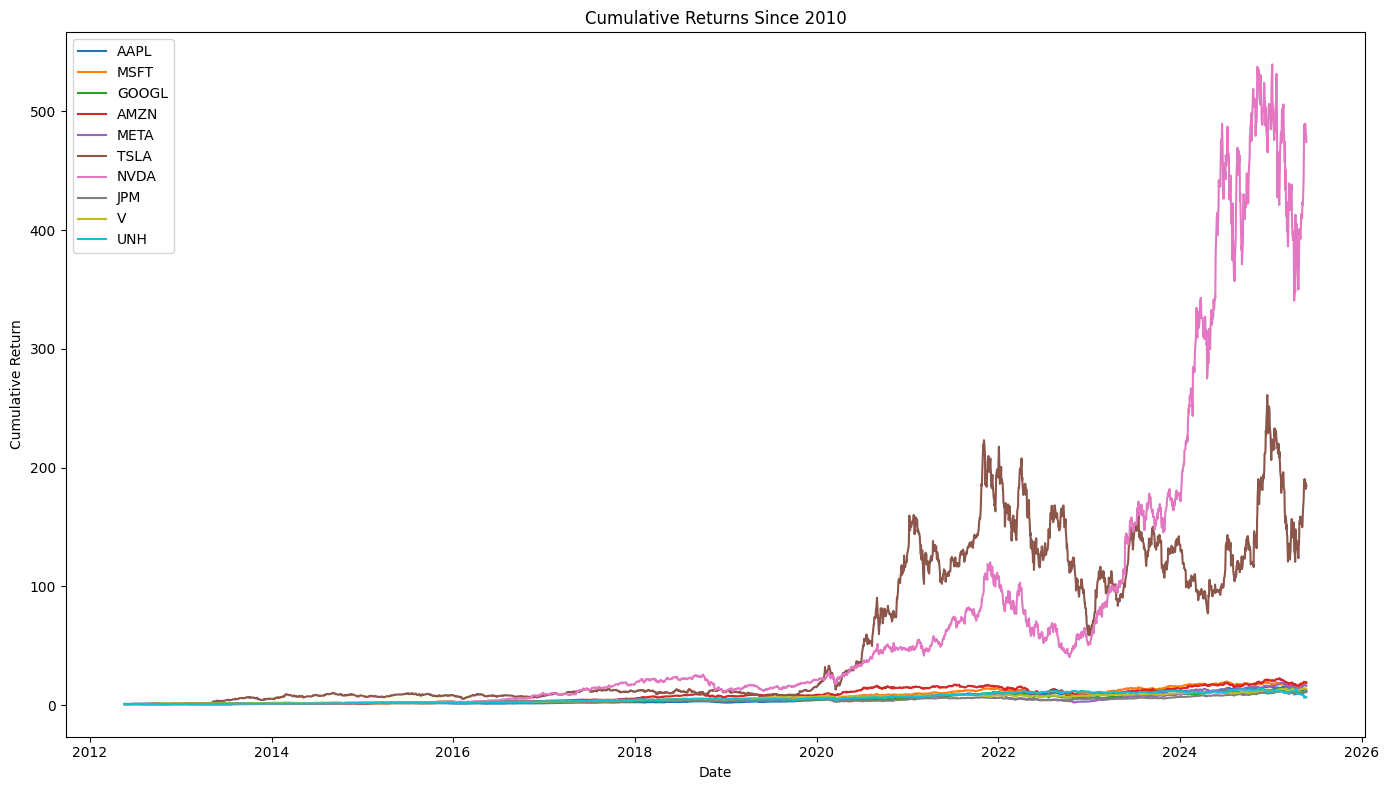

In [ ]:
#Cumulative Returns Plot
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(cumulative_returns[ticker], label=ticker)
plt.title("Cumulative Returns Since 2010")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
